In [94]:
import root_numpy as rn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib

%matplotlib inline

matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.weight'] = 'bold'

In [118]:
f = 'Files/ShowerRecoEff.root'
f = 'Files/ShowerRecoEff_single_pi0.root'
f = 'Files/ShowerRecoEff_single_pi0_v2.root'

r = rn.root2array(f,treename='tree')
df = pd.DataFrame(r)
#df = df.query('mc_detProf_e > 0')

print df.shape

(111051, 36)


In [119]:
#print 5095./193215
#print 1./(5095./193215)

In [120]:
#plt.hist(df.mc_st_y.values)

In [121]:
df_reco = df.query('n_recod_true_showers > 0')
print df_reco.shape, df.shape

(52773, 36) (111051, 36)


[ 1959.  7834.  9619.  8799.  6586.  4578.  3266.  2716.  1898.  1431.
  1062.   777.   499.   332.   151.]
[ 0.00434521  0.0054367   0.00648135  0.00718354  0.00854299  0.010284
  0.01299733  0.01492134  0.01631162  0.0195275   0.02294998  0.02594025
  0.02796904  0.0300105   0.0364703 ]


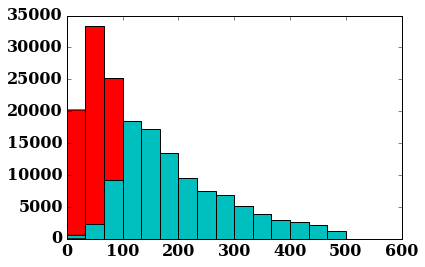

In [122]:
nbins = 15
xmax = 500 #500
countsreco,edges,_ = plt.hist(df_reco.mc_detProf_e.values,bins=nbins,range=(0,xmax))
countsmc,_,_ = plt.hist(df.mc_detProf_e.values,bins=nbins,range=(0,xmax))

print countsreco

bins = (edges[:-1] + edges[1:])/2

err_comb = (countsreco/countsmc)*np.sqrt(1./countsreco + 1./countsmc)
print err_comb

low,edgesl,_ = plt.hist(df.low_shr_e.values,bins=nbins,range=(0,xmax))
high,edgesh,_ = plt.hist(df.high_shr_e.values,bins=nbins,range=(0,xmax))

left, right = edgesl[:-1], edgesl[1:]
e_bins = np.array([left,right]).T.flatten()

low_flat = np.array([low,low]).T.flatten()
high_flat = np.array([high,high]).T.flatten()


#low_area = low_flat / 1700
#high_area = high_flat / 1700

# For single particle
low_area = low_flat / 35000
high_area = high_flat / 35000

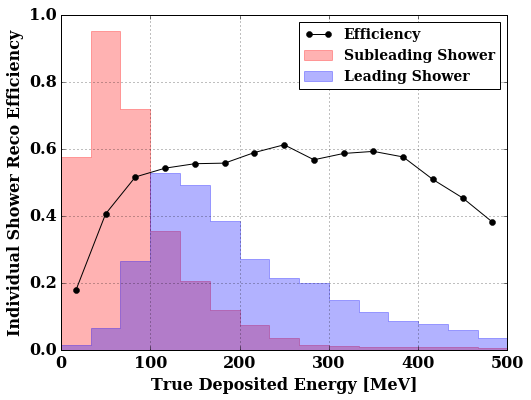

In [123]:
plt.figure(figsize=(8,6))

fig, ax = plt.subplots(figsize=(8,6))
ax.fill_between(e_bins,0,low_area,color='red',label="Subleading Shower",alpha=0.3)
ax.fill_between(e_bins,0,high_area,color='blue',label="Leading Shower",alpha=0.3)
#plt.errorbar(bins,countsreco/countsmc,yerr=err_comb,label='Efficiency',marker='o',color='k',lw=1.5)
plt.plot(bins,countsreco/countsmc,'k-',marker='o',label='Efficiency')
plt.ylim(0,1)
plt.xlabel('True Deposited Energy [MeV]',weight='bold')
plt.legend(loc=0,fontsize=14) #'upper left',bbox_to_anchor=(1,0.5))
#plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.ylabel('Individual Shower Reco Efficiency',weight='bold')
plt.grid(True)

In [39]:
## For single particle sample

In [115]:
df_new = df.query('low_shr_e > 15')
df_new_reco = df_new.query('n_recod_true_showers > 0')

print df_new.shape[0]
print df.shape[0]

102738
111051


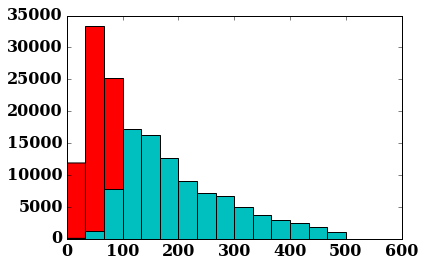

In [116]:
nbins = 15
xmax = 500 #500
countsreco,edges,_ = plt.hist(df_new_reco.mc_detProf_e.values,bins=nbins,range=(0,xmax))
countsmc,_,_ = plt.hist(df_new.mc_detProf_e.values,bins=nbins,range=(0,xmax))

bins = (edges[:-1] + edges[1:])/2

low,edgesl,_ = plt.hist(df_new.low_shr_e.values,bins=nbins,range=(0,xmax))
high,edgesh,_ = plt.hist(df_new.high_shr_e.values,bins=nbins,range=(0,xmax))

left, right = edgesl[:-1], edgesl[1:]
e_bins = np.array([left,right]).T.flatten()

low_flat = np.array([low,low]).T.flatten()
high_flat = np.array([high,high]).T.flatten()

low_area = low_flat / 35000
high_area = high_flat / 35000

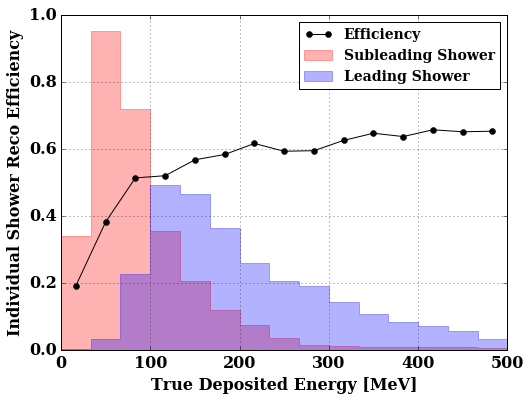

In [117]:
plt.figure(figsize=(8,6))

fig, ax = plt.subplots(figsize=(8,6))
ax.fill_between(e_bins,0,low_area,color='red',label="Subleading Shower",alpha=0.3)
ax.fill_between(e_bins,0,high_area,color='blue',label="Leading Shower",alpha=0.3)
plt.plot(bins,countsreco/countsmc,'k-',marker='o',label='Efficiency')
plt.ylim(0,1)
plt.xlabel('True Deposited Energy [MeV]',weight='bold')
plt.legend(loc=0,fontsize=14) #'upper left',bbox_to_anchor=(1,0.5))
plt.ylabel('Individual Shower Reco Efficiency',weight='bold')
plt.grid(True)
